In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [10]:
df = pd.read_csv("./raw_data/bank_train.csv")
display(df)

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,41.0,management,single,tertiary,NaN,no,4522.0,no,no,cellular,28,aug,55,1.0,-1,0.0,unknown,no
1,1,42.0,blue-collar,married,primary,NaN,yes,398.0,yes,n,unknown,16,may,251,4.0,-1,0.0,unknown,no
2,2,26.0,student,single,secondary,Lisboa,no,706.0,no,no,unknown,8,oct,118,1.0,105,2.0,other,no
3,3,54.0,management,married,tertiary,NaN,no,0.0,no,y,cellular,19,nov,307,3.0,-1,0.0,unknown,no
4,4,43.0,self-employed,married,secondary,Porto,no,918.0,yes,no,unknown,6,may,193,1.0,-1,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39995,43.0,management,married,tertiary,Lisboa,no,13851.0,yes,no,cellular,21,nov,259,1.0,-1,0.0,unknown,no
39996,39996,34.0,blue-collar,married,primary,NaN,no,357.0,yes,no,unknown,14,may,197,2.0,-1,0.0,unknown,no
39997,39997,30.0,management,single,tertiary,NaN,no,4889.0,no,no,cellular,11,aug,545,2.0,-1,0.0,unknown,yes
39998,39998,40.0,self-employed,married,tertiary,Lisboa,no,271.0,yes,no,cellular,21,nov,124,3.0,102,4.0,failure,no


<h3>Análise do Dataframe</h3>

In [11]:
df.info()
#id->feito: dropado (ok)
#age->feito: remoção dos outliers, remoção das crianças (outliers lower_range)
#falta: dados ausentes
#job->falta: dados ausentes e unknowns, get_dummies()
#marital-> falta: dados ausentes, get_dummies()
#education-> falta: unknowns, get_dummies()
#location->feito: removida (50% dos dados ausentes) (ok)
#default->feito: passado para números (ok)
#balance->falta: dados ausentes, remoção dos outliers
#housing->feito: passado para números (ok)
#loan->feito: passado para números (ok)
#contact->falta: dados ausentes, unknowns, get_dummies()
#day->falta: dropar coluna? get_dummies()? unir com months?
#month->feito: passado para números
#falta: get_dummies()? unir com dias?
#duration->feito: remover outliers (ok)
#campaign->falta: dados faltantes, remover outliers
#pdays->falta: remover outliers, transformar em categórica?
#previous->falta: dados ausentes, remover outliers, transformar em categórica?
#poutcome->falta: unknowns, get_dummies()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         40000 non-null  int64  
 1   age        38801 non-null  float64
 2   job        38651 non-null  object 
 3   marital    39903 non-null  object 
 4   education  40000 non-null  object 
 5   location   18498 non-null  object 
 6   default    40000 non-null  object 
 7   balance    38208 non-null  float64
 8   housing    40000 non-null  object 
 9   loan       40000 non-null  object 
 10  contact    39266 non-null  object 
 11  day        40000 non-null  int64  
 12  month      40000 non-null  object 
 13  duration   40000 non-null  int64  
 14  campaign   38603 non-null  float64
 15  pdays      40000 non-null  int64  
 16  previous   39703 non-null  float64
 17  poutcome   40000 non-null  object 
 18  y          40000 non-null  object 
dtypes: float64(4), int64(4), object(11)
memory usa

<h4>Analise breve dos dados do conjunto de dados</h4>
<p>Ao observar a descrição do conjunto de dados abaixo, temos alguns casos um tanto quanto absurdos. Por exemplo: pessoas com oito anos de idade e 150 anos.</p>

In [12]:
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,40000.00000,38801.000000,38208.000000,40000.000000,40000.000000,38603.000000,40000.000000,39703.000000
mean,19999.50000,40.962475,1364.645545,15.820250,380.420875,2.752040,40.363700,0.584994
std,11547.14972,11.029089,3059.020764,8.328291,3044.410537,3.042173,100.294987,2.342661
min,0.00000,8.000000,-8019.000000,1.000000,-20.000000,1.000000,-1.000000,0.000000
25%,9999.75000,33.000000,73.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,19999.50000,39.000000,450.500000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,29999.25000,48.000000,1423.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,39999.00000,150.000000,102127.000000,31.000000,75000.000000,58.000000,871.000000,275.000000


In [13]:
df.duplicated().sum() #o dataframe não apresenta duplicadas

0

In [14]:
df.isna().sum()
#que apresentam dados faltantes: age, job, marital, location (vai ser dropada), balance, contact, campaign, previous
#que apresentam dados unknown: job, education, contact, poutcome

id               0
age           1199
job           1349
marital         97
education        0
location     21502
default          0
balance       1792
housing          0
loan             0
contact        734
day              0
month            0
duration         0
campaign      1397
pdays            0
previous       297
poutcome         0
y                0
dtype: int64

In [15]:
for col in df.columns:
  print(col.upper())
  print(df[col].unique(), df[col].dtype, "\n")

ID
[    0     1     2 ... 39997 39998 39999] int64 

AGE
[ 41.  42.  26.  54.  43.  34.  40.  45.  51.  21.  32.  60.  47.  46.
  31.  53.  27.  29.  35.  36.  nan  25.  37.  50.  77.  57.  30.  58.
  33.  44.  48.  55.  61.  84.  28.  39.  63.  59.  38.  70.  56.  65.
  49.  22.  71.  52.  74.  23.  24.  64.  19.  78.  62.  73.  69.  67.
  66.  80.  68.  86.   8. 150.  72.  76.  83.  75.  20.  85.  82.  79.
  87.  81.  18.  95.  88.  89.  90.  92.  94.  93.] float64 

JOB
['management' 'blue-collar' 'student' 'self-employed' 'technician'
 'administrator' 'retired' 'housemaid' 'services' 'unemployed' nan
 'admin.' 'unknown' 'entrepreneur'] object 

MARITAL
['single' 'married' 'divorced' nan] object 

EDUCATION
['tertiary' 'primary' 'secondary' 'unknown'] object 

LOCATION
[nan 'Lisboa' 'Porto' 'Amadora' 'Braga' 'Coimbra' 'Faro'] object 

DEFAULT
['no' 'yes'] object 

BALANCE
[ 4522.   398.   706. ...  4820. 13851.  4889.] float64 

HOUSING
['no' 'yes'] object 

LOAN
['no' 'n' 'y' 'yes'

In [16]:
df.dtypes

id             int64
age          float64
job           object
marital       object
education     object
location      object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign     float64
pdays          int64
previous     float64
poutcome      object
y             object
dtype: object

<h3>Plotagem de gráficos (valores absolutos)</h3>

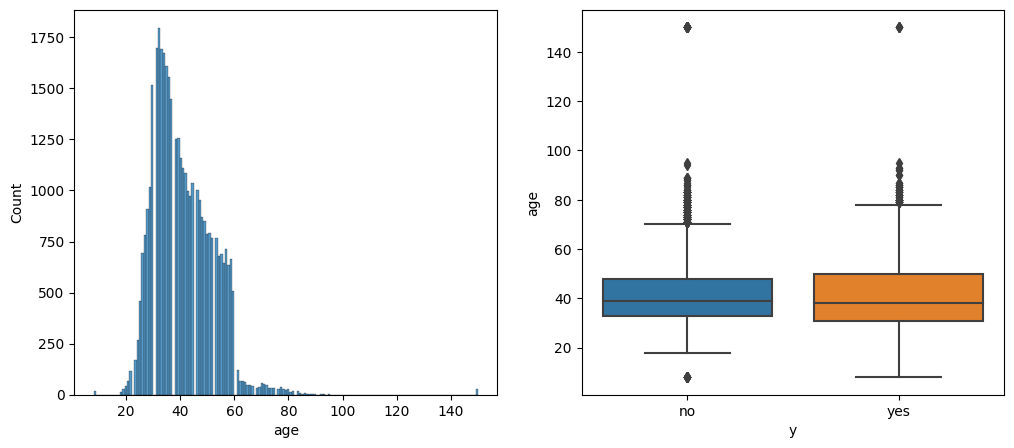

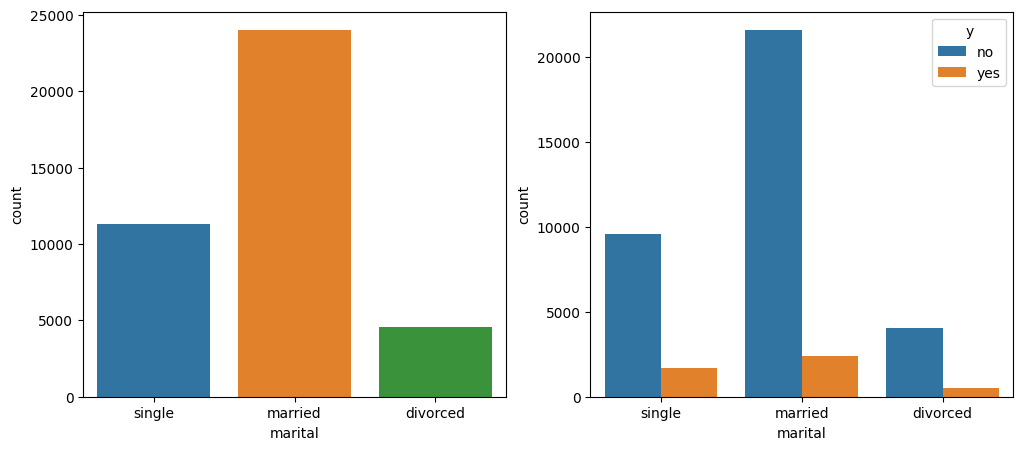

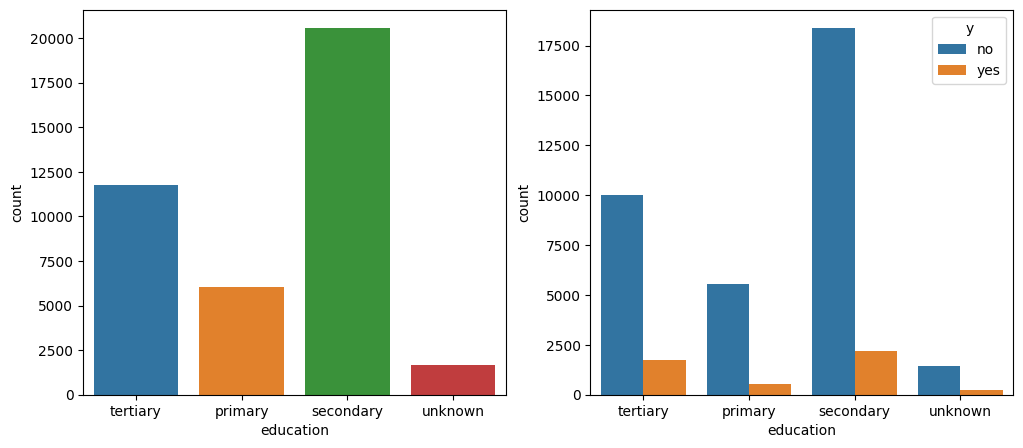

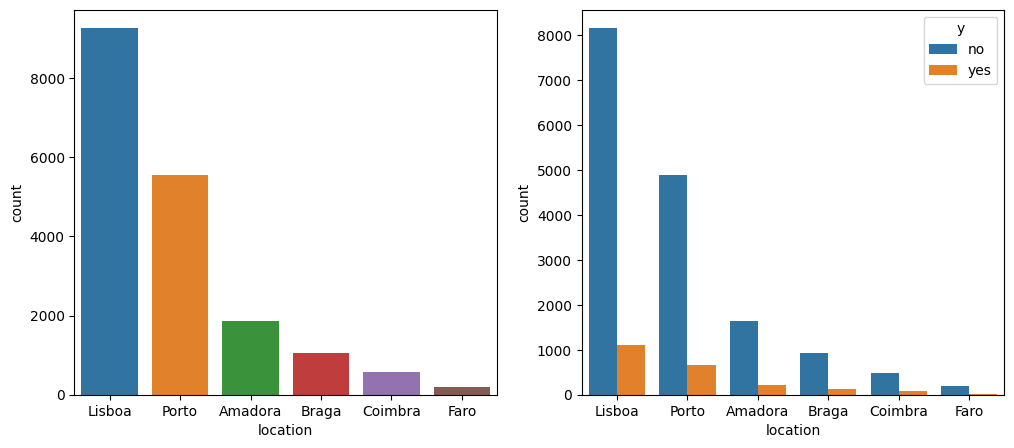

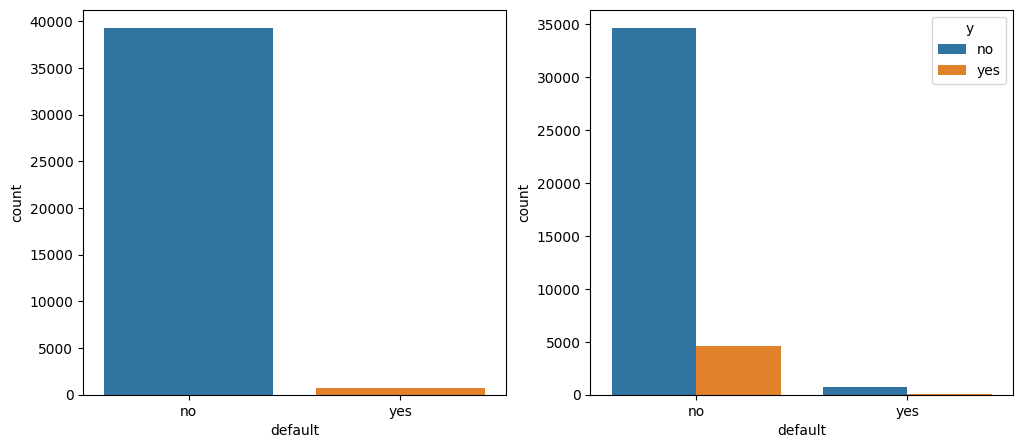

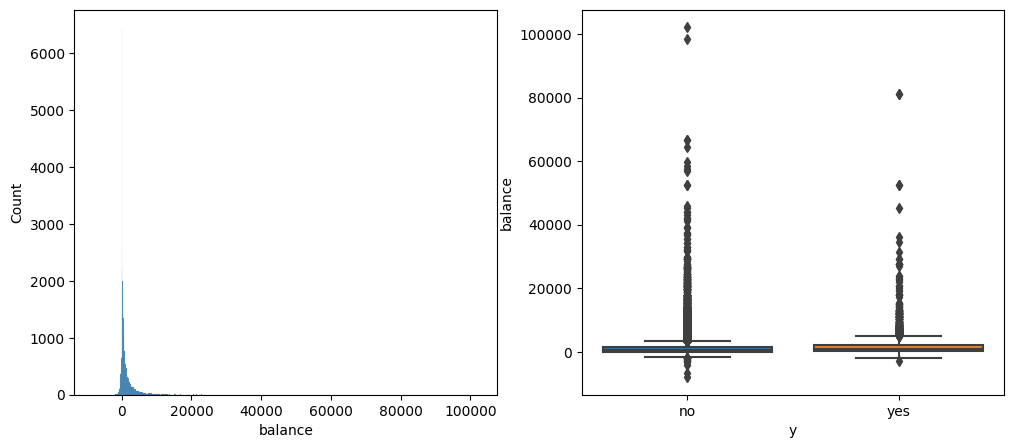

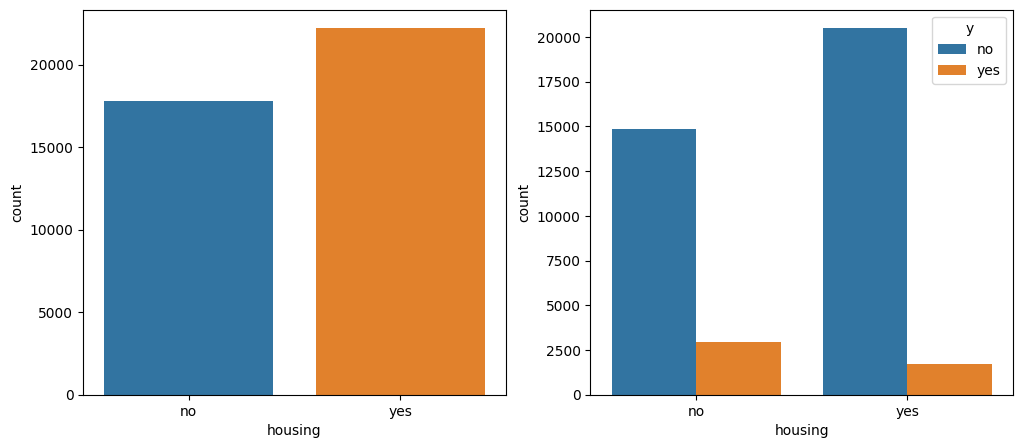

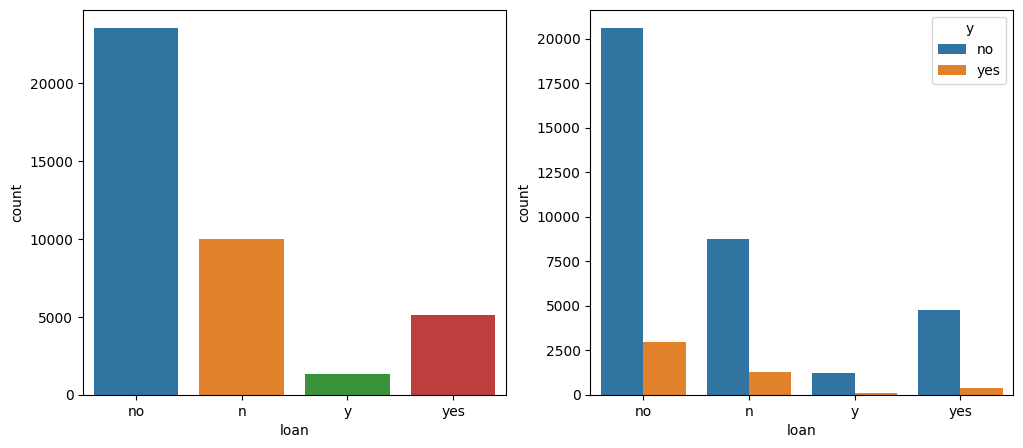

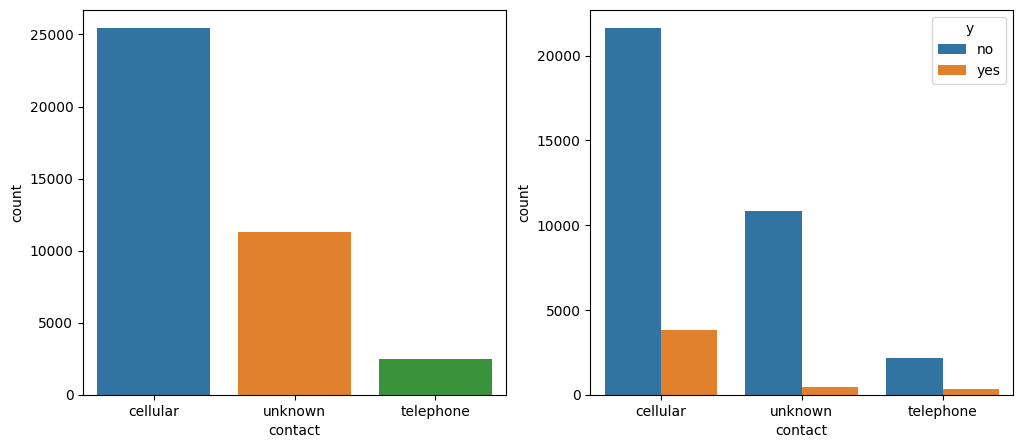

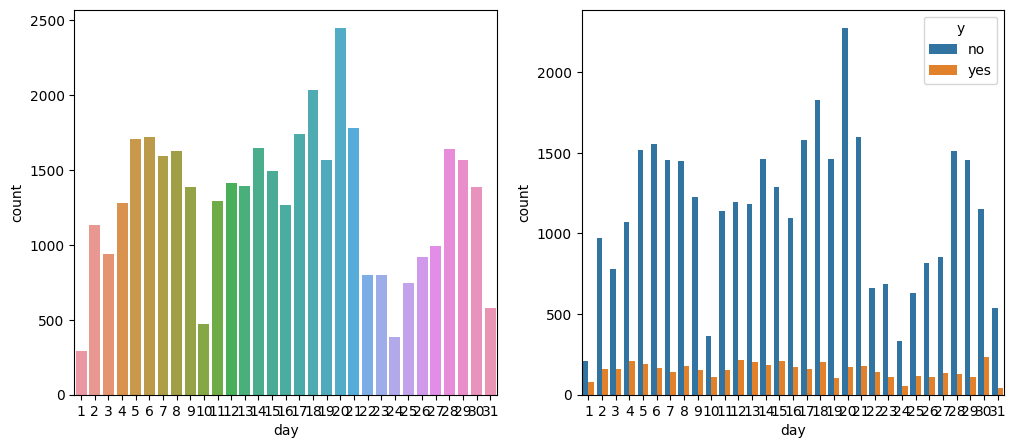

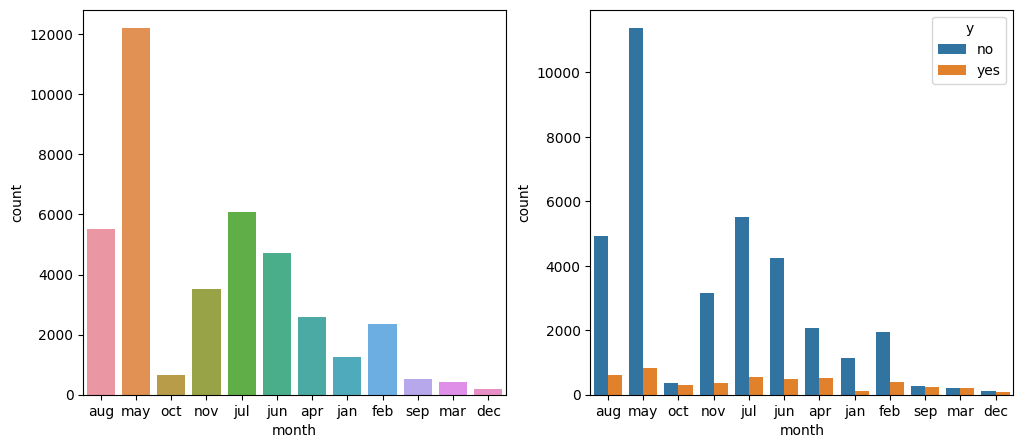

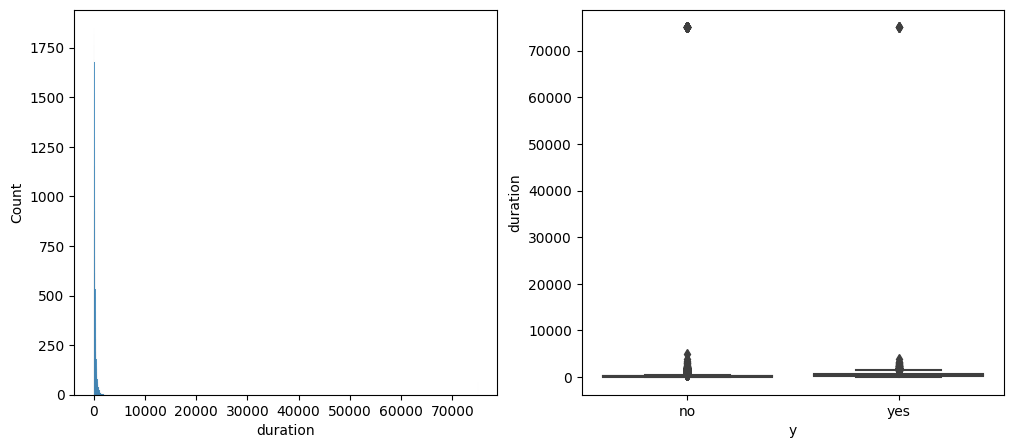

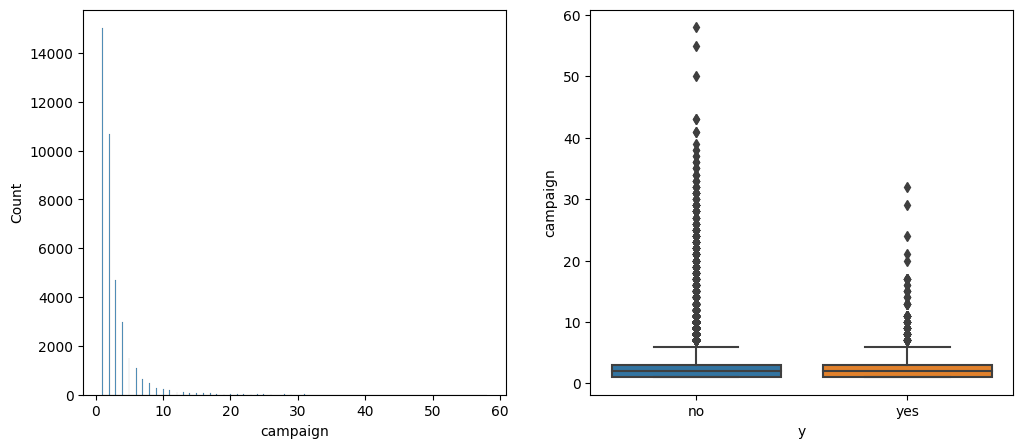

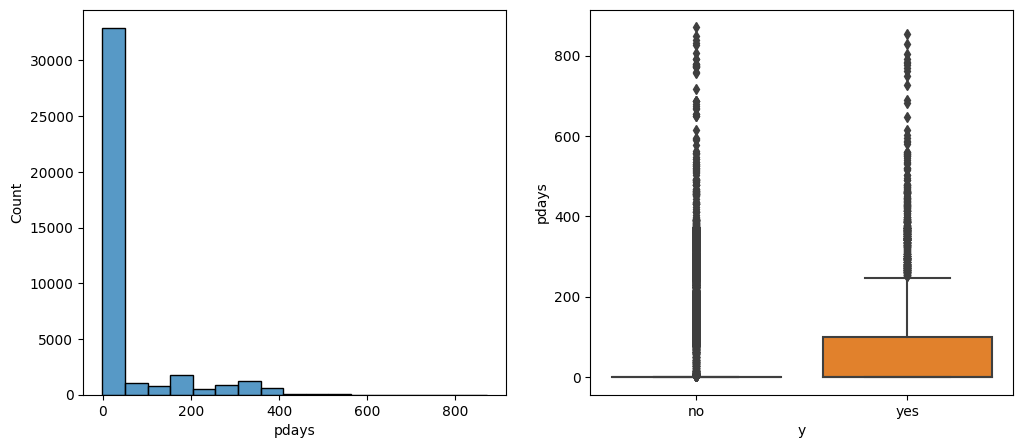

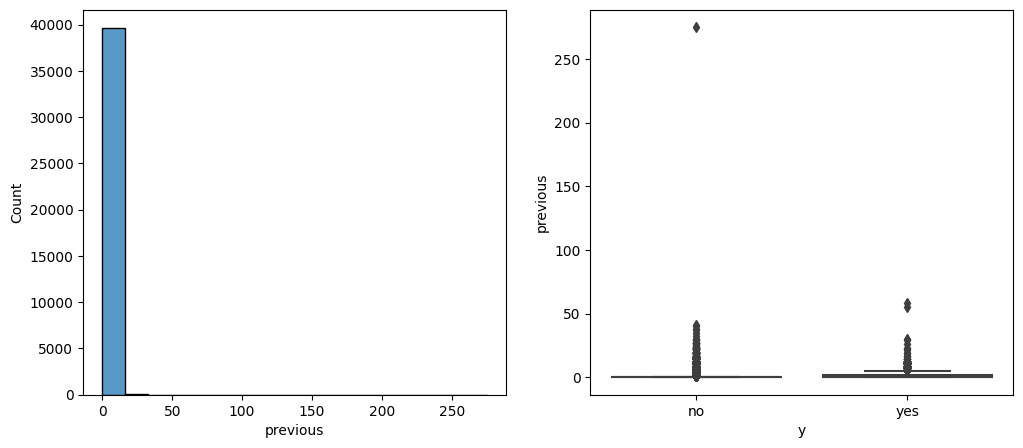

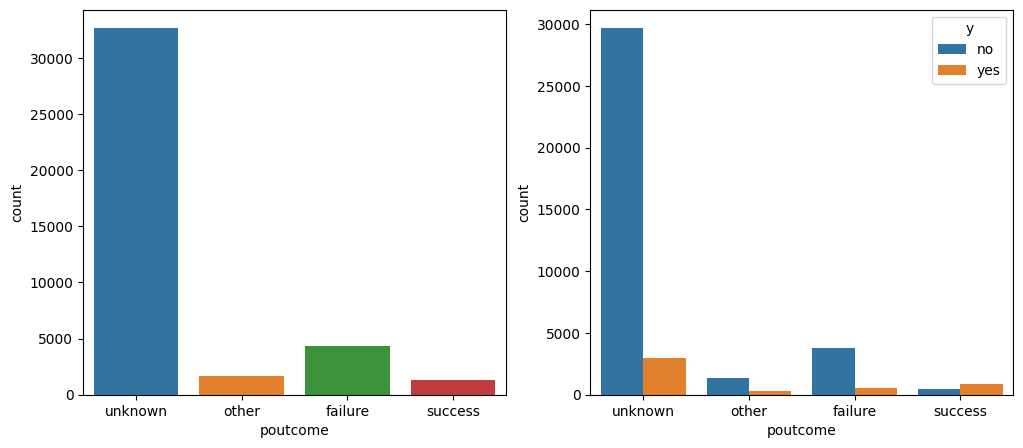

In [17]:
#plotagem de diversos gráficos para a análise exploratória
categoricas = np.array(("marital","education","day","month","location","default","housing","loan","contact","poutcome"))
numericas = np.array(("age","balance","duration","campaign","pdays","previous"))

for feature in (df.columns):
  if feature in categoricas:
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.countplot(data = df, x = feature)
    plt.subplot(1,2,2)
    sns.countplot(data = df, x = feature, hue = "y")
    plt.show()
  elif feature in numericas:
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.histplot(data = df, x = feature)
    plt.subplot(1,2,2)
    sns.boxplot(data = df, y = feature, x = "y")
    plt.show()

<h3>Plotagem de gráficos (valores relativos a target)</h3>

<AxesSubplot:xlabel='marital'>

<Figure size 2000x500 with 0 Axes>

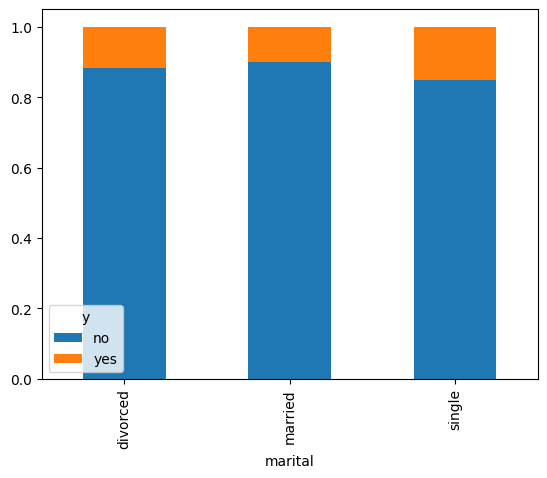

In [18]:
#conferindo se vale a pena manter ou não a coluna marital
plt.figure(figsize = (20,5))
(df.groupby('marital')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)
#impacto mínimo, não vale a pena ser mantida

<AxesSubplot:xlabel='education'>

<Figure size 2000x500 with 0 Axes>

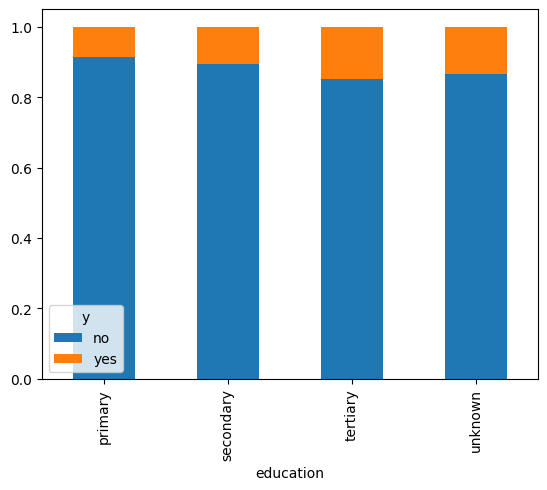

In [19]:
#analisando a coluna education
plt.figure(figsize = (20,5))
(df.groupby('education')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)

<AxesSubplot:xlabel='default'>

<Figure size 2000x500 with 0 Axes>

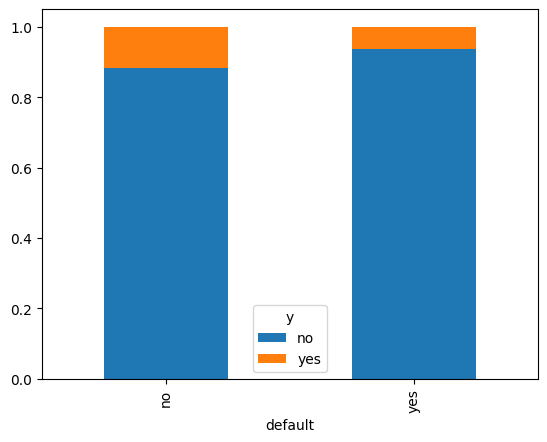

In [20]:
#analisando a coluna default
plt.figure(figsize = (20,5))
(df.groupby('default')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)

In [21]:
#Não consegui fazer a matriz de correlação
# df_temp = df.copy()
# for feature in df.columns:
#   if feature not in ['balance', 'y']:
#     df_temp = df_temp.drop(feature, axis=1)
# df_temp.corr() <- erro

<AxesSubplot:xlabel='month'>

<Figure size 2000x500 with 0 Axes>

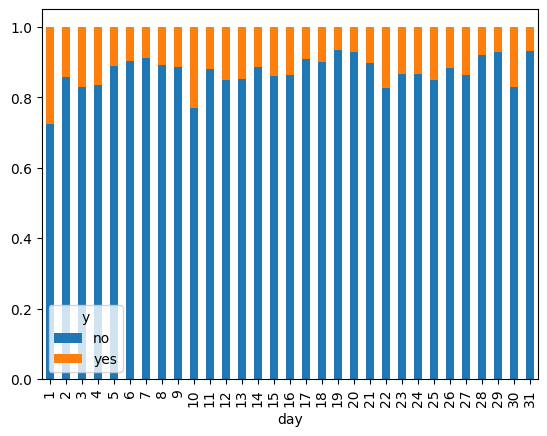

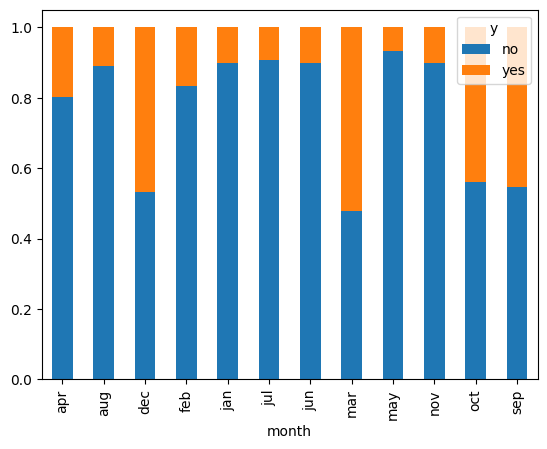

In [22]:
#conferindo a coluna days/months
plt.figure(figsize = (20,5))
(df.groupby('day')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)
(df.groupby('month')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)

<AxesSubplot:xlabel='contact'>

<Figure size 2000x500 with 0 Axes>

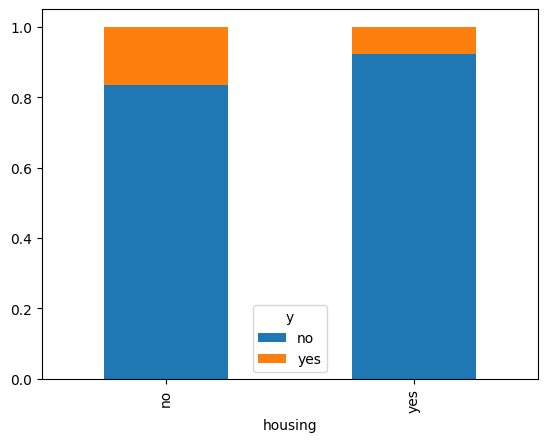

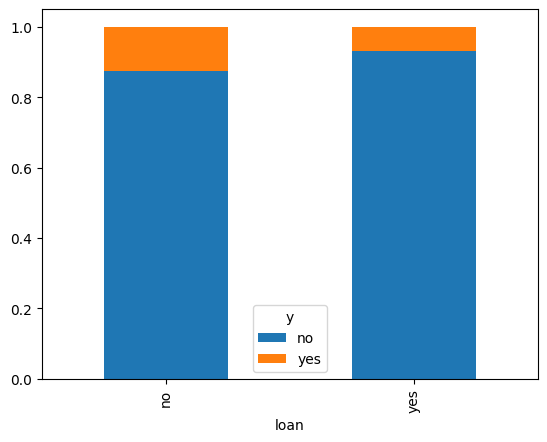

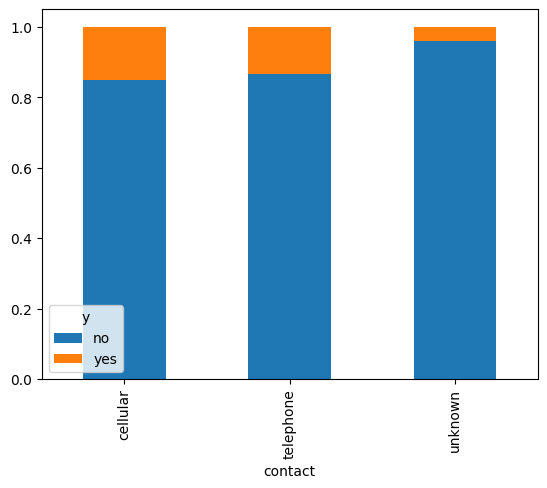

In [23]:
#conferindo as colunas housing, loan, contact
df_loan_corrected = df.copy() #copiando df, pois irá ser alterado
df_loan_corrected['loan'] = df_loan_corrected['loan'].replace({'y': 'yes', 'n': 'no'})
plt.figure(figsize = (20,5))
(df.groupby('housing')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)
(df_loan_corrected.groupby('loan')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)
(df.groupby('contact')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)

[]

<Figure size 2000x500 with 0 Axes>

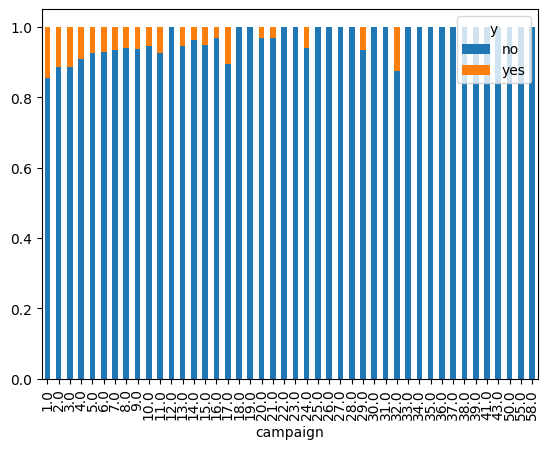

In [24]:
#conferindo campaign
plt.figure(figsize = (20,5))
(df.groupby('campaign')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)
plt.plot()

[]

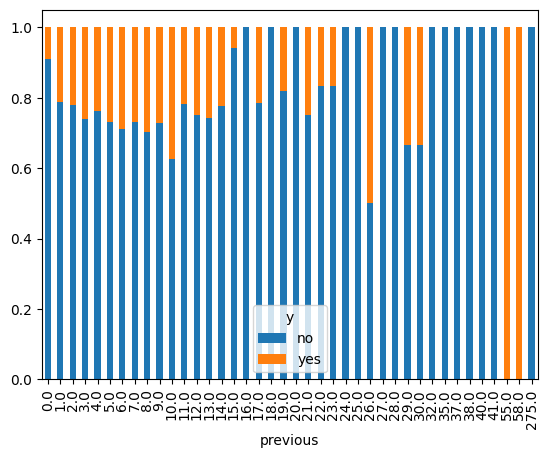

In [25]:
#conferindo campaign
(df.groupby('previous')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)
plt.plot()

[]

<Figure size 2000x500 with 0 Axes>

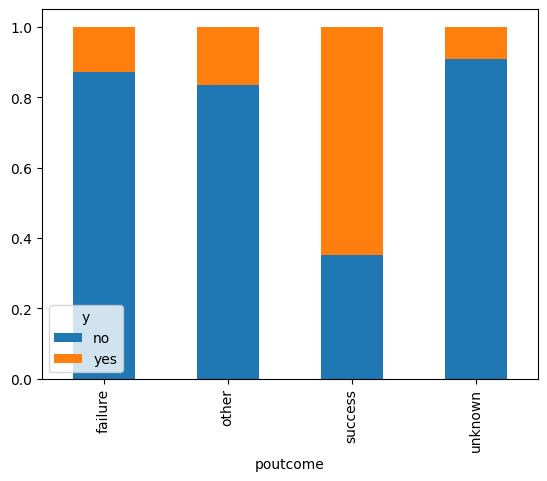

In [26]:
#conferindo o poutcome
plt.figure(figsize = (20,5))
(df.groupby('poutcome')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)
plt.plot()

###Análise de Relações entre Features

<AxesSubplot:xlabel='balance', ylabel='job'>

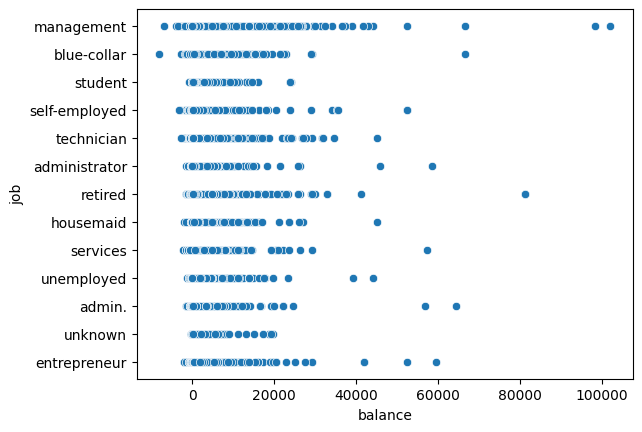

In [27]:
sns.scatterplot(data=df, x="balance", y="job") #scatterplot do balanço por trabalho (análise)

[]

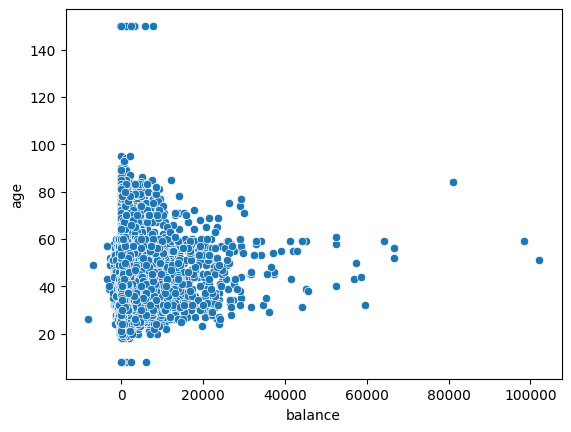

In [28]:
sns.scatterplot(data=df, x="balance", y="age") #scatterplot do balanço por age (análise)
#mais ricos são os indíviduos 30 e 60
plt.plot()

[]

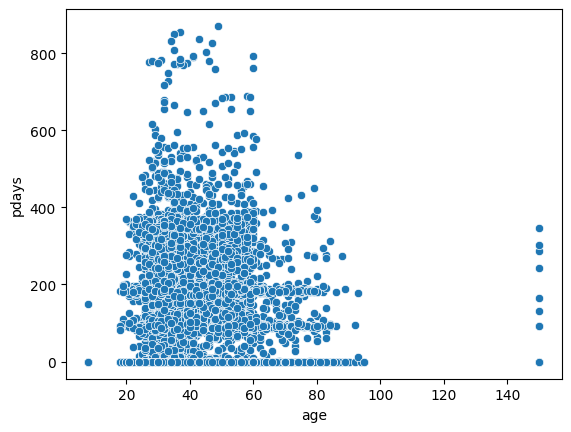

In [31]:
sns.scatterplot(data=df, x="age", y="pdays") #scatterplot do pdays por age (análise)
plt.plot()